In [19]:
import pandas as pd
import numpy as np
import fiona
from shapely.geometry import shape, Polygon, MultiPolygon, Point, MultiPoint, MultiLineString
import cPickle as pickle

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2C57-DBDD

 Directory of C:\Users\andersrmr\Documents\Python Scripts\galvanize_prep\pothole_repair\sandbox

09/22/2015  04:50 PM    <DIR>          .
09/22/2015  04:50 PM    <DIR>          ..
09/22/2015  04:44 PM    <DIR>          .ipynb_checkpoints
09/18/2015  04:20 PM           335,717 bubble.png
09/16/2015  11:59 PM           220,561 chloropleth.png
09/22/2015  12:06 AM           183,495 city_potholes.pkl
09/22/2015  03:05 PM    <DIR>          data
09/21/2015  05:50 PM           216,553 df_1499to1999_cleaned.pkl
09/22/2015  11:44 AM           203,160 df_1999to2499_cleaned.pkl
09/21/2015  10:41 PM           893,024 df_1to1999_cleaned.pkl
09/22/2015  12:06 AM           971,726 df_1to1999_features.pkl
09/21/2015  11:50 PM           793,993 df_1to1999_geo_cleaned.pkl
09/22/2015  11:51 AM           193,186 df_2499to2999_cleaned.pkl
09/22/2015  11:55 AM           212,659 df_2999to3499_cleaned.pkl
09/22/2015  12:00 PM           221,511 df_34

In [6]:
df = pd.read_pickle('df_1to1999_geo_cleaned.pkl')

In [7]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA"
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1998
Data columns (total 12 columns):
OBJECTID         1320 non-null int64
WOKEY            1320 non-null int64
LOCATION         1320 non-null object
ADDRDESC         1320 non-null object
INITDT_dt        1320 non-null datetime64[ns]
FLDSTARTDT_dt    1320 non-null datetime64[ns]
FLDENDDT_dt      1320 non-null datetime64[ns]
DURATION         1320 non-null timedelta64[ns]
DURATION_td      1320 non-null float64
latitude         1320 non-null float64
longitude        1320 non-null float64
address          1320 non-null object
dtypes: datetime64[ns](3), float64(3), int64(2), object(3), timedelta64[ns](1)
memory usage: 134.1+ KB


####Now I want to find the line geometry in the streetmap shapefile that is closest to each pothole geometry and featurize the information of that line for each pothole.

In [9]:
# Read in shapefile
shapefilename = 'data/WGS84/Street_Network_Database'
shp = fiona.open(shapefilename+'.shp')

In [10]:
# Get street segments and their indices
segs = [shape(seg['geometry']) for seg in shp]
#shp.close()

In [11]:
len(segs)

33913

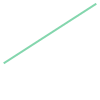

In [23]:
segs[0]

In [12]:
shp.schema

{'geometry': 'LineString',
 'properties': OrderedDict([(u'F_INTR_ID', 'int:9'), (u'T_INTR_ID', 'int:9'), (u'SND_ID', 'int:9'), (u'SND_FEACOD', 'int:9'), (u'CITYCODE', 'int:9'), (u'STNAME_ID', 'int:9'), (u'ST_CODE', 'int:9'), (u'ARTERIAL_C', 'int:9'), (u'SEGMENT_TY', 'int:9'), (u'AGENCY_COD', 'int:9'), (u'ACCESS_COD', 'int:9'), (u'DIVIDED_CO', 'int:9'), (u'STRUCTURE_', 'int:9'), (u'LEGALLOC_C', 'int:9'), (u'VEHICLE_US', 'int:9'), (u'GIS_SEG_LE', 'float:19.11'), (u'L_ADRS_FRO', 'int:9'), (u'L_ADRS_TO', 'int:9'), (u'R_ADRS_FRO', 'int:9'), (u'R_ADRS_TO', 'int:9'), (u'ORD_PRE_DI', 'str:2'), (u'ORD_STREET', 'str:20'), (u'ORD_STRE_1', 'str:4'), (u'ORD_SUF_DI', 'str:2'), (u'ORD_STNAME', 'str:31'), (u'L_CITY', 'str:20'), (u'L_STATE', 'str:2'), (u'L_ZIP', 'str:5'), (u'R_CITY', 'str:20'), (u'R_STATE', 'str:2'), (u'R_ZIP', 'str:5'), (u'SNDSEG_UPD', 'date'), (u'COMPKEY', 'int:9'), (u'COMPTYPE', 'int:9'), (u'UNITID', 'str:16'), (u'UNITID2', 'str:16'), (u'SHAPE_Leng', 'float:19.11')])}

Are the linestrings "standalone", or do I need to link them together, like I used MultiPolygon to link together the block group polygons?

In [22]:
# Associate each linestring with a dict of the desired features
line_string_tup = []
idx = 0
for feature in shp:
#     print MultiLineString(segs)[idx]
    print segs[idx]
    idx += 1
    if idx == 10:
        break
#     print feature['properties']['GEOID']

LINESTRING (-122.308826734 47.49780621700006, -122.3091893 47.49757283900004)
LINESTRING (-122.312544808 47.48675669800008, -122.313017658 47.48586029900008)
LINESTRING (-122.314404433 47.47963375800003, -122.3147574289999 47.47774685000007)
LINESTRING (-122.313750409 47.48314825100005, -122.314084206 47.48134536900005)
LINESTRING (-122.345808814 47.49211262200004, -122.348123865 47.49207631700006)
LINESTRING (-122.348885266 47.49285460300007, -122.348866677 47.49206465800006)
LINESTRING (-122.348123865 47.49207631700006, -122.348866677 47.49206465800006)
LINESTRING (-122.348866677 47.49206465800006, -122.349902932 47.49204838900005, -122.349965621 47.49204733800008)
LINESTRING (-122.307439424 47.49934315400003, -122.306882441 47.49933886600007, -122.3067667559999 47.49932199700004)
LINESTRING (-122.304640944 47.49934098600005, -122.3026078029999 47.49933489900008, -122.302512829 47.49934902900003, -122.302419831 47.49936826400005, -122.3023294019999 47.49939247700007, -122.302242118 4

It takes a while to build each of the multilinestrings, while just going with the linestrings themselves is instant, obviously, since there is no function call.  Does it make a difference?  Only testing will tell.  First, try without multilinestring.

In [ ]:
# Associate each linestring with a dict of the desired features
line_string_tup = []
idx = 0
for feature in shp:
    block_group_tup.append((MultiPolygon(polys)[idx],\
    feature['properties']['GEOID']))
    idx += 1

In [ ]:
shp.close()